In [1]:
import numpy as np
v = np.array([1,1])
v
v.shape

(2,)

In [2]:
m = np.array([[3,2], [3,2]])
m
m[0,[0]]

array([3])

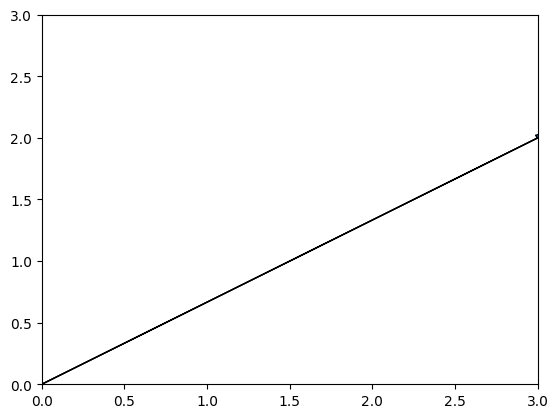

In [3]:
import matplotlib.pyplot as plt

plt.xlim(0, 3)
plt.ylim(0, 3)

d0=m[0]
d1=m[1]
dx=d0[0]
dy=d0[1]

plt.arrow(0, 0, dx, dy, head_width=0.05, head_length=0.1)

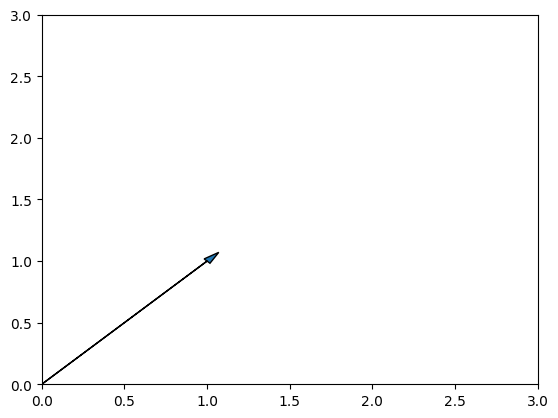

In [4]:
plt.xlim(0, 3)
plt.ylim(0, 3)

plt.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.1)

L2 norm formula is Euclidean distance (hypotenuse of triangle formed by x length and y length of vector)

$$||x||_{2} = \sqrt{x_{1}^{2} + x_{2}^{2} +\cdots + x_{n}^{2}}$$

For v: 1^2 + 1^2 = 2;
sqrt(2) ~ 1.41

In [5]:
np.sum(v ** 2)

np.int64(2)

In [6]:
np.sqrt(np.sum(v ** 2))

np.float64(1.4142135623730951)

In [7]:
v3 = np.array([0, 1, 2])

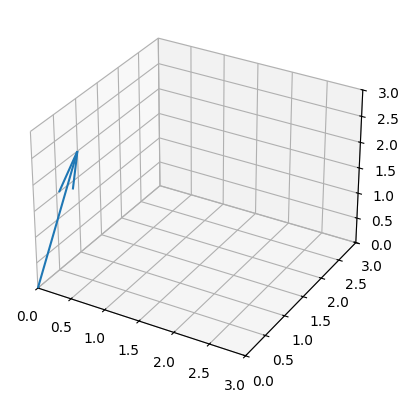

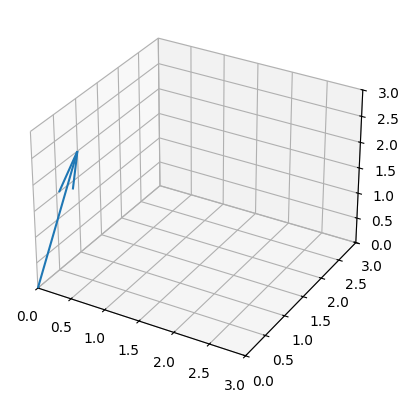

In [8]:
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')

ax.set_xlim([0, 3])
ax.set_ylim([0, 3])
ax.set_zlim([0, 3])

ax.quiver(0, 0, 0, v3[0], v3[1], v3[2], length=1)

fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')

ax.set_xlim([0, 3])
ax.set_ylim([0, 3])
ax.set_zlim([0, 3])

ax.quiver(0, 0, 0, v3[0], v3[1], v3[2], length=1)

In [9]:
v5 = np.array([0, 1, 2, 3, 4])

Scaling vectors

In [10]:
v_half = np.array([2,1]) * 0.5
v_half

array([1. , 0.5])

Adding vectors

In [11]:
v_add  = np.array([1,1]) + v_half
v_add

array([2. , 1.5])

Basis vectors

Canonical basis vectors:

0,1

1,0

In [12]:
v1 = np.array([0,1])
v2 = np.array([1,0])

In [13]:
# Can use basis vectors to reach any point in 2D space
# 0.3, 1

v1 + v2 * 0.3



array([0.3, 1. ])

In [14]:
# Basis vectors are orthogonal to each other
# So dot product equals zero

np.dot(v1,v2)

np.int64(0)

You can change basis vectors

Important usage in ML and DL

In [15]:
M = np.array([[0,1,2], [1,0,2], [3,1,0]])
M

array([[0, 1, 2],
       [1, 0, 2],
       [3, 1, 0]])

Matrix variable is uppercase by convention in programming and math

In [16]:
M.shape

(3, 3)

Linear regression formula

$\hat{y} = wx + b$

In [17]:
import pandas as pd

# Read in the data
data = pd.read_csv("/content/clean_weather.csv", index_col=0)
# Fill missing data with past data
# Fill NA/NaN values by propagating the last valid observation to next valid.
data = data.ffill()

data.head(5)


,tmax,tmin,rain,tmax_tomorrow
1970-01-01,60.0,35.0,0.0,52.0
1970-01-02,52.0,39.0,0.0,52.0
1970-01-03,52.0,35.0,0.0,53.0
1970-01-04,53.0,36.0,0.0,52.0
1970-01-05,52.0,35.0,0.0,50.0


$\hat{y} = w_1 x_1 + w_2 x_2 + w_3 x_3 + b$



---


Matrix multiplication

In [18]:
X = data[['tmax', 'tmin', 'rain']].iloc[:3].to_numpy()
X

array([[60., 35.,  0.],
       [52., 39.,  0.],
       [52., 35.,  0.]])

In [19]:
X.shape

(3, 3)

In [20]:
X_T = X.T
X_T

array([[60., 52., 52.],
       [35., 39., 35.],
       [ 0.,  0.,  0.]])

In [21]:
w = np.array([0.7, 0.3, 1])
w.shape

(3,)

Reshaping w vector (1D) to W matrix with 3 rows and 1 column.

Reshape requires same # of elements in original array and new array.

In [22]:
W = w.reshape(3,1)
W

array([[0.7],
       [0.3],
       [1. ]])

In [23]:
X @ W

array([[52.5],
       [48.1],
       [46.9]])

In [24]:
np.dot(X,W)

array([[52.5],
       [48.1],
       [46.9]])

In [25]:
np.dot([2j, 2 + 3j], [2j, 3j])

np.complex128(-13+6j)

In [26]:
np.dot([2,3], [2,3])

np.int64(13)

In [27]:
np.dot([1j,1j], [1j,1j])

np.complex128(-2+0j)

In [28]:
b = np.array([10])
# b is bias given for example, not calculated

Y = X @ W + b
Y

array([[62.5],
       [58.1],
       [56.9]])

Slope-intercept formula relation

$y = mx + b$



---

Normal Equation Method vs Gradient Descent

$$W = (X^T X)^{-1} X^T Y$$

In [29]:
norm = ((X_T * X) ** -1) * X_T * Y
norm

/tmp/ipython-input-29-82921689.py:1: RuntimeWarning: divide by zero encountered in reciprocal
  norm = ((X_T * X) ** -1) * X_T * Y
/tmp/ipython-input-29-82921689.py:1: RuntimeWarning: invalid value encountered in multiply
  norm = ((X_T * X) ** -1) * X_T * Y


array([[1.04166667, 1.78571429,        inf],
       [1.11730769, 1.48974359,        inf],
       [       nan,        nan,        nan]])